# **Trabajo Practico 1: Vision por computadora, espacios del color**

Entrega:
       
*   Barbara
*   Pedro Perez

In [1]:
!python -m pip install numpy matplotlib Pillow
!pip install scikit-image
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim
print(sys.version)


3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]


## Funciones de Coordenadas Cromáticas

Las funciones `to_chromatic_coordsv1` y `to_chromatic_coordsv2` están diseñadas para convertir una imagen en coordenadas cromáticas. Las coordenadas cromáticas son una forma de representar el color de un píxel que es independiente de la intensidad de la luz. Esto se logra normalizando los valores de los canales de color (rojo, verde y azul) por la suma total de estos valores.

### Pasos de la Conversión:

1. **Conversión a valores flotantes**: Las imágenes suelen estar en un formato de enteros de 8 bits, donde cada canal de color (rojo, verde, azul) tiene un valor entre 0 y 255. Para realizar cálculos precisos, se convierten estos valores a números de punto flotante.

2. **Cálculo de la suma de los canales RGB**: Para cada píxel de la imagen, se calcula la suma de los valores de los canales rojo, verde y azul.

3. **Normalización de los valores de color**: Cada valor de color (rojo, verde, azul) se divide por la suma total de los valores de color para ese píxel, dando como resultado un conjunto de valores normalizados que suman 1.

4. **Manejo de la división por cero**: Para evitar la división por cero en píxeles negros, se emplean dos enfoques:
   - En `to_chromatic_coordsv1`, se añade un pequeño valor (0.001) al denominador.
   - En `to_chromatic_coordsv2`, se verifica si la suma de los canales RGB es cero y, de ser así, se reemplaza por 1.

### Fórmula de Coordenadas Cromáticas:

Para un píxel con valores de color RGB, las coordenadas cromáticas se calculan como:

$$
\text{Coordenada cromática del canal} = \frac{\text{Valor del canal}}{\text{Suma de los valores de los canales RGB}}
$$

El resultado final es una representación de la imagen en coordenadas cromáticas, donde cada píxel tiene tres valores que representan su color de manera independiente de la intensidad de la luz.


In [4]:
### Parte 1: Implementación de Funciones

import os
from PIL import Image


def to_chromatic_coordsv1(image):
    float_img = np.array(image).astype(np.float32)
    # Calcular los canales RGB
    sum_rgb = np.sum(float_img, axis=2, keepdims=True) + 0.001  #Añadir 0.001 para evitar dividir por 0
    # Calculo de coordenadas cromaticas
    chromatic_coords_img = float_img / sum_rgb
    return chromatic_coords_img


def to_chromatic_coordsv2(image):
    float_img = np.array(image, dtype=float)
    sum_rgb = np.sum(float_img, axis=2, keepdims=True)
    sum_rgb[sum_rgb == 0] = 1  # Evitar la divisio por cero
    chromatic_coords_img = float_img / sum_rgb
    return chromatic_coords_img







## Función `process_images_in_folder`

Esta función procesa imágenes en una carpeta y las convierte a coordenadas cromáticas usando dos métodos distintos.

### Parámetros:
- `folder_path`: Ruta de la carpeta con imágenes.

### Proceso:
1. Inicializa listas para imágenes originales y convertidas.
2. Itera sobre archivos de imagen (`.png`, `.jpg`, `.jpeg`) en la carpeta.
3. Abre cada imagen y la convierte usando `to_chromatic_coordsv1` y `to_chromatic_coordsv2`.
4. Almacena las imágenes originales y convertidas en las listas correspondientes.


- Devuelve una tupla con tres listas: imágenes originales, imágenes convertidas con el primer método, e imágenes convertidas con el segundo método.


In [5]:
def process_images_in_folder(folder_path):
    images = []
    chromatic_images_v1 = []
    chromatic_images_v2 = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            chromatic_image_v1 = to_chromatic_coordsv1(image)
            chromatic_image_v2 = to_chromatic_coordsv2(image)
            images.append(image)
            chromatic_images_v1.append(chromatic_image_v1)
            chromatic_images_v2.append(chromatic_image_v2)
    return images, chromatic_images_v1, chromatic_images_v2

## Visualización de Imágenes Originales y Cromáticas

En esta sección, se utilizan las imágenes procesadas por la función `process_images_in_folder` para visualizar las imágenes originales y sus correspondientes versiones en coordenadas cromáticas.


1. **Establecer la ruta de la carpeta**: Se asigna la ruta de la carpeta que contiene las imágenes a la variable `folder_path`.

2. **Procesamiento de imágenes**: Se llama a la función `process_images_in_folder` con `folder_path` como argumento, y se desempaqueta el resultado en tres listas: `original_images`, `chromatic_images_v1` y `chromatic_images_v2`.

3. **Visualización de imágenes**:
   - Se itera sobre las tres listas simultáneamente usando `enumerate` y `zip`.
   - Para cada trío de imágenes (original, cromática v1 y cromática v2), se crea una figura con tres subplots.
   - Se muestra la imagen original en el primer subplot, la imagen cromática v1 en el segundo y la imagen cromática v2 en el tercero.
   - Se añaden títulos a cada subplot y se ocultan los ejes.


Se muestran las imágenes originales junto con sus versiones convertidas a coordenadas cromáticas usando las dos versiones diferentes de la función de conversión. Esto permite comparar visualmente las diferencias entre las imágenes originales y las imágenes procesadas.


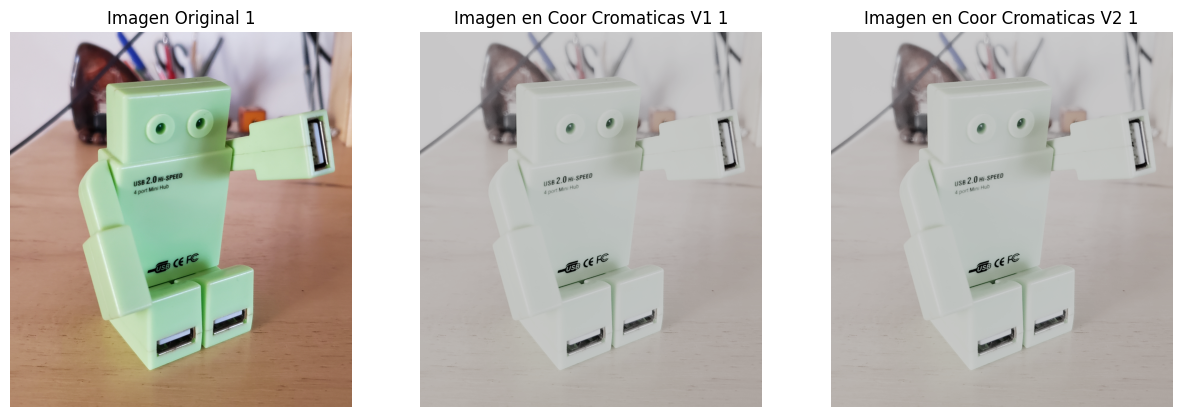

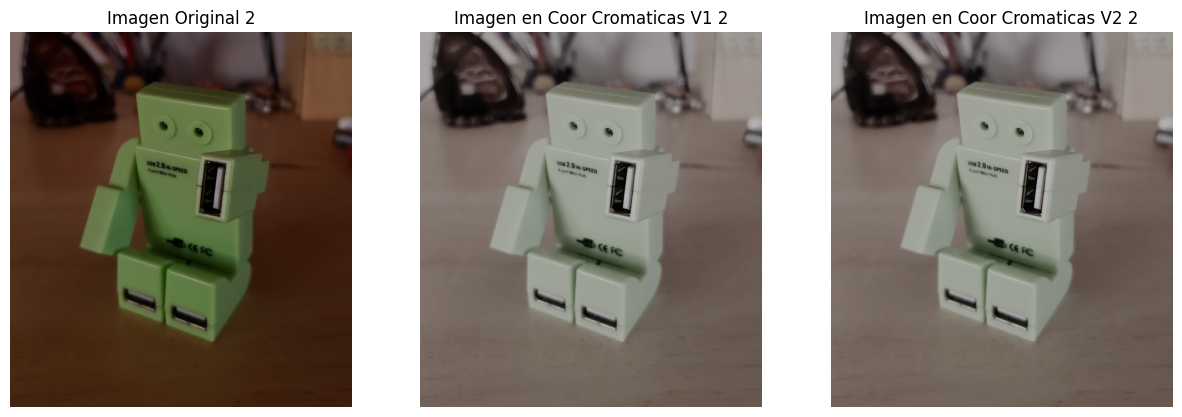

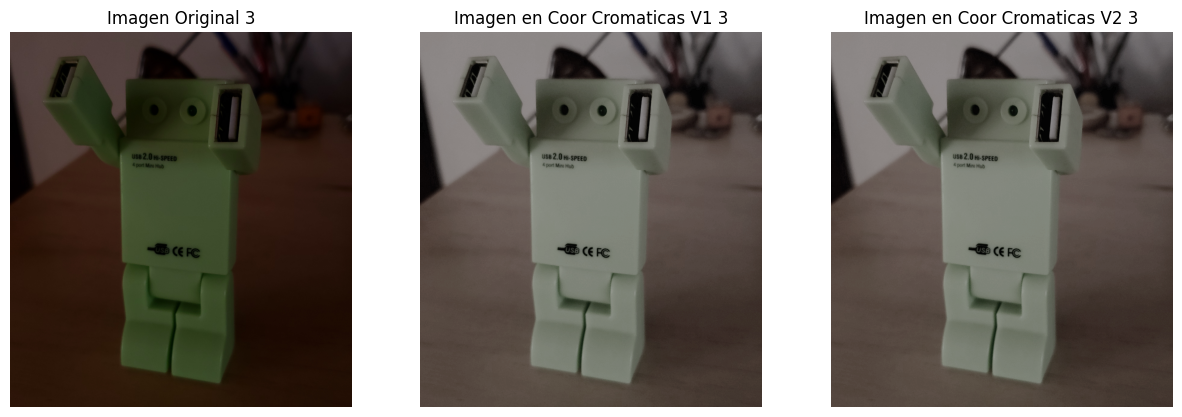

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Definir la ruta correcta
folder_path = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\coord_cromaticas'

# Procesar las imágenes en la carpeta
original_images, chromatic_images_v1, chromatic_images_v2 = process_images_in_folder(folder_path)

# Mostrar las imágenes originales y en coordenadas cromáticas
for i, (original, chromatic_v1, chromatic_v2) in enumerate(zip(original_images, chromatic_images_v1, chromatic_images_v2)):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title(f'Imagen Original {i + 1}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(chromatic_v1)
    plt.title(f'Imagen en Coor Cromaticas V1 {i + 1}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(chromatic_v2)
    plt.title(f'Imagen en Coor Cromaticas V2 {i + 1}')
    plt.axis('off')

    plt.show()


## Explicación de la Función `white_patch`

La función `white_patch` aplica el algoritmo White Patch a una imagen para corregir el balance de blancos.

### Parámetros:
- `image`: Imagen de entrada en formato RGB (PIL Image).
- `perc`: Porcentaje para calcular los valores máximos de los canales RGB. Por defecto, se usa el 100%, que corresponde al valor máximo.


1. **Conversión a RGB**: Asegura que la imagen esté en formato RGB.
2. **Conversión a Array**: Convierte la imagen de PIL a un array de NumPy.
3. **Descomposición de Canales RGB**: Separa la imagen en sus componentes rojo, verde y azul.
4. **Cálculo de Valores Máximos**: Calcula el valor máximo o el percentil especificado para cada canal RGB.
5. **Aplicación de White Patch**: Corrige cada canal RGB dividiendo por su valor máximo y escalando a 255.
6. **Recombinación de Canales**: Combina los canales RGB corregidos en una sola imagen.

`imgRGB_new`: Imagen con el balance de blancos corregido.


## Algoritmo White Patch

El algoritmo White Patch se basa en la suposición de que el color blanco en una escena debe aparecer como blanco en la imagen, independientemente de la iluminación. Para lograr esto, se ajustan los canales RGB de la imagen de manera que el valor más alto en cada canal se convierta en blanco puro (255).



1. **Descomposición de Canales RGB**:
   - La imagen se descompone en sus tres canales de color: rojo (R), verde (G) y azul (B).

2. **Cálculo de Valores Máximos**:
   - Se calcula el valor máximo para cada canal:
     $$
     \text{max}_R, \text{max}_G, \text{max}_B
     $$

     que pueden ser los valores máximos reales o percentiles especificados.

3. **Aplicación de White Patch**:
   - Cada canal se ajusta de acuerdo a la siguiente fórmula:
$$
    \text{Canal ajustado} = \text{clip}\left(\frac{255}{\text{max}_\text{Canal}} \times \text{Canal original}, 0, 255\right)
$$
   - Donde "clip" asegura que los valores ajustados se mantengan dentro del rango [0, 255].

4. **Recombinación de Canales**:
   - Los canales ajustados se recombinan para formar la imagen final con el balance de blancos corregido.


- Este ajuste hace que el color más brillante en la imagen original se convierta en blanco puro en la imagen corregida, asumiendo que este color más brillante debería ser blanco bajo una iluminación neutra.
- La corrección se aplica por separado a cada canal, lo que ayuda a compensar los desequilibrios de color causados por la iluminación.


In [8]:
import cv2 as cv
#### 2. Función para Aplicar el Algoritmo White Patch

def white_patch(image, perc=100):
        # Asegurarnos que la imagen esté realmente en formato RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Convertir PIL image TO ARRAY
    image = np.array(image)

    # Desplegar componente RGB con split
    im_r, im_g, im_b = cv.split(image)

    # Calcular percentiles o valores maximos
    if perc == 100:
        max_r = np.max(im_r)
        max_g = np.max(im_g)
        max_b = np.max(im_b)
    else:
        max_r = np.percentile(im_r, perc)
        max_g = np.percentile(im_g, perc)
        max_b = np.percentile(im_b, perc)

    # Aplicamo white patch
    im_r_new = np.clip((255 / max_r) * im_r, 0, 255).astype('uint8')
    im_g_new = np.clip((255 / max_g) * im_g, 0, 255).astype('uint8')
    im_b_new = np.clip((255 / max_b) * im_b, 0, 255).astype('uint8')

    # Unir en una sola imagen
    imgRGB_new = cv.merge((im_r_new, im_g_new, im_b_new))

    return imgRGB_new






In [9]:
def process_images_in_folder_multiple_white_patches(folder_path, percs=[100, 95, 70]):
    images = []
    white_patched_images = {perc: [] for perc in percs}
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            images.append(image)
            for perc in percs:
                white_patched_image = white_patch(image, perc=perc)
                white_patched_images[perc].append(white_patched_image)
    return images, white_patched_images


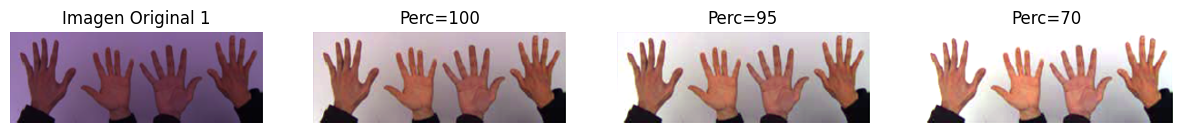

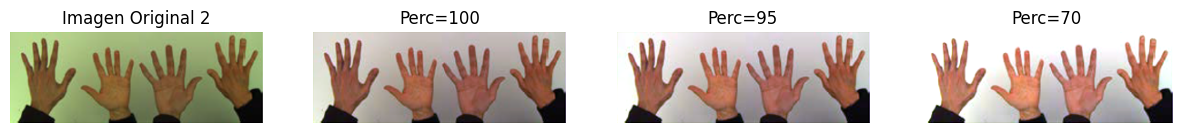

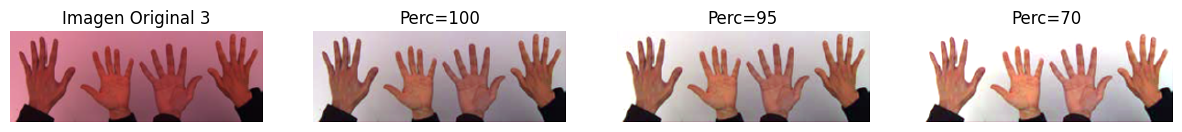

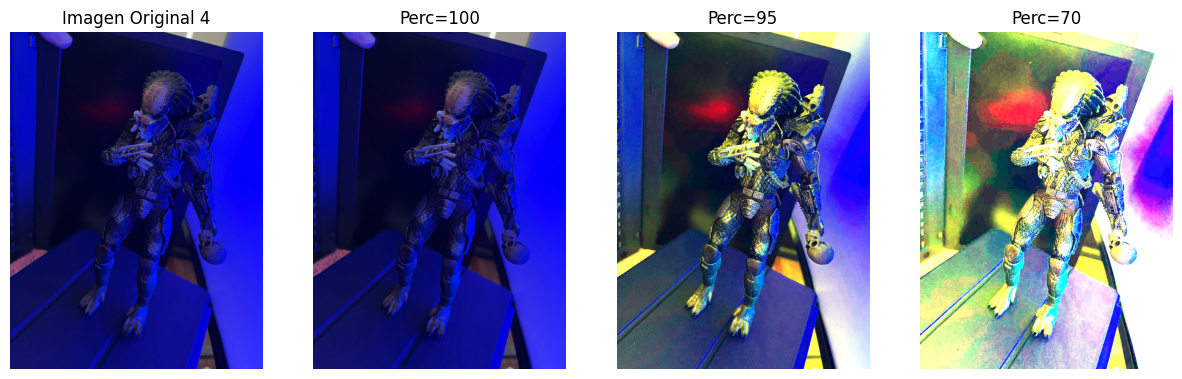

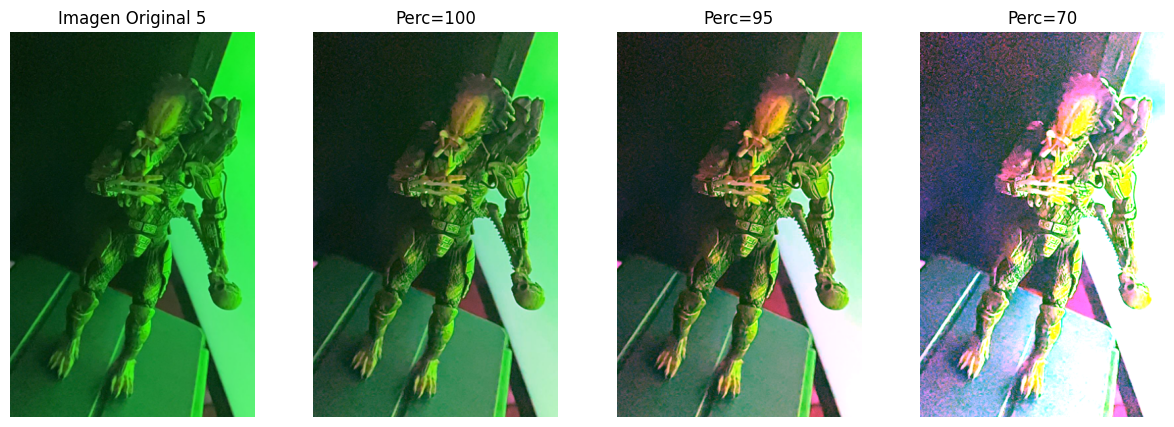

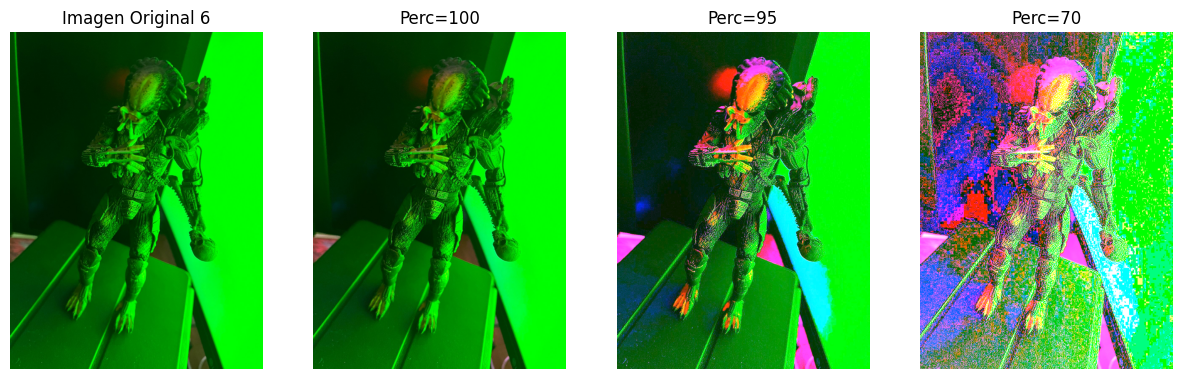

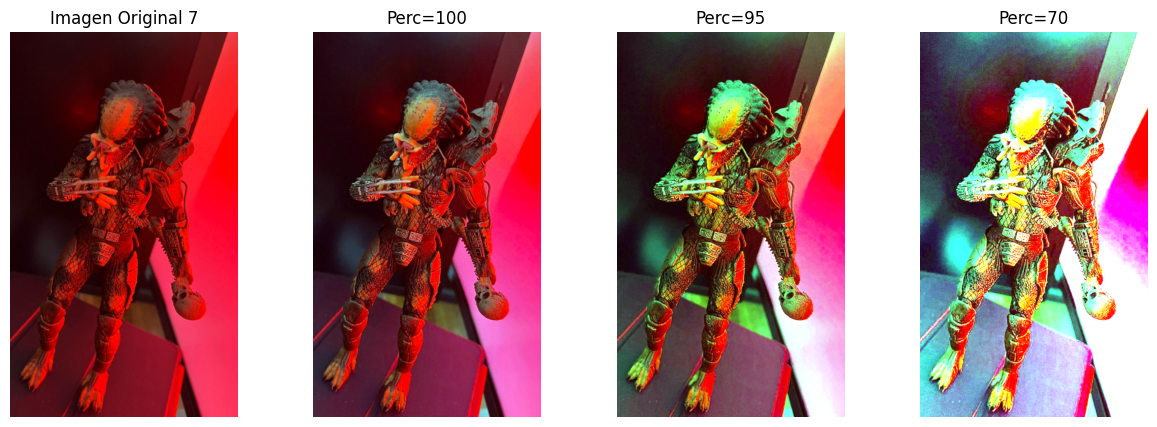

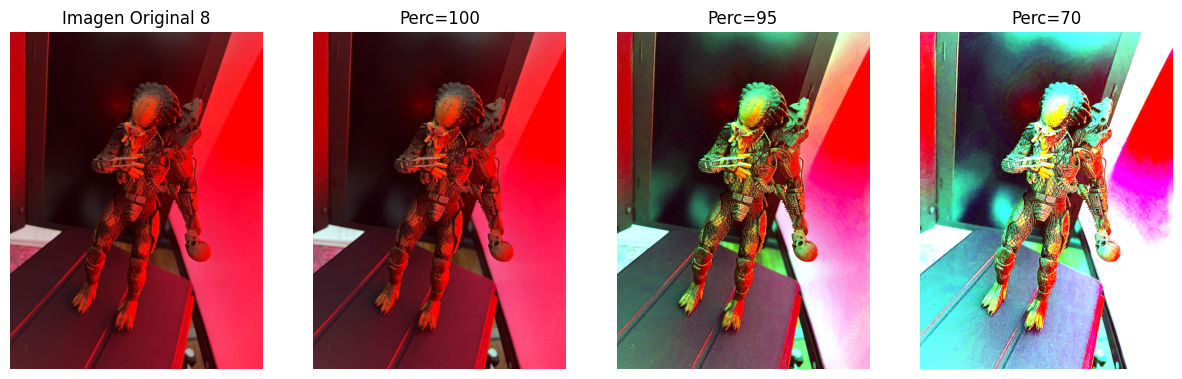

In [13]:
folder_path_white_patch = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\white_patch'
original_images_wp, white_patched_images_dict = process_images_in_folder_multiple_white_patches(folder_path_white_patch, percs=[100, 95, 70])

for i, original in enumerate(original_images_wp):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(original)
    plt.title(f'Imagen Original {i + 1}')
    plt.axis('off')

    for j, perc in enumerate([100, 95, 70], start=2):
        plt.subplot(1, 4, j)
        plt.imshow(white_patched_images_dict[perc][i])
        plt.title(f'Perc={perc}')
        plt.axis('off')

    plt.show()


In [17]:
import os
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_ssim(image1, image2):
    # Convert images to grayscale for SSIM computation
    image1_gray = np.dot(image1[...,:3], [0.2989, 0.5870, 0.1140])
    image2_gray = np.dot(image2[...,:3], [0.2989, 0.5870, 0.1140])

    # Determine the data range based on the image data type
    if image1_gray.dtype == np.float64 or image2_gray.dtype == np.float64:
        data_range = 1.0  # Assuming the floating-point images are normalized to the range [0, 1]
    else:
        data_range = 255  # Assuming the images are 8-bit per channel

    return ssim(image1_gray, image2_gray, data_range=data_range)


def process_and_compare_images(folder_path, processing_function, is_pil=False):
    original_images = []
    processed_images = []
    ssim_values = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            original_array = np.array(image)

            if is_pil:
                processed_image = processing_function(Image.fromarray(original_array))
            else:
                processed_image = processing_function(original_array)

            original_images.append(image)
            processed_images.append(processed_image)

            ssim_values.append(calculate_ssim(original_array, processed_image))

    return original_images, processed_images, ssim_values

# Process and compare images for each folder
original_images_chromatic, chromatic_images, ssim_chromatic = process_and_compare_images(folder_path_chromatic, to_chromatic_coordsv1)
original_images_wp, white_patched_images, ssim_wp = process_and_compare_images(folder_path_white_patch, white_patch, is_pil=True)



# Folder paths
folder_path_chromatic = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\coord_cromaticas'
folder_path_white_patch = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\white_patch'



# Display the results for chromatic coordinates
for i in range(len(original_images_chromatic)):
    print(f"Image {i + 1} (Chromatic Coords): SSIM = {ssim_chromatic[i]}")

# Display the results for white patch
for i in range(len(original_images_wp)):
    print(f"Image {i + 1} (White Patch): SSIM = {ssim_wp[i]}")


Image 1 (Chromatic Coords): SSIM = 4.457004433584681e-06
Image 2 (Chromatic Coords): SSIM = 2.173431707035221e-05
Image 3 (Chromatic Coords): SSIM = 3.663103060898599e-05
Image 1 (White Patch): SSIM = 0.7761165764496735
Image 2 (White Patch): SSIM = 0.9854816044285547
Image 3 (White Patch): SSIM = 0.8979988726315717
Image 4 (White Patch): SSIM = 1.0
Image 5 (White Patch): SSIM = 0.9275438192481728
Image 6 (White Patch): SSIM = 0.9910181672778411
Image 7 (White Patch): SSIM = 0.8556829596527498
Image 8 (White Patch): SSIM = 0.9774960388577612


**las imágenes procesadas con el algoritmo White Patch muestran en general una alta similitud estructural con la imagen de referencia, mientras que las imágenes procesadas con coordenadas cromáticas muestran una similitud estructural muy baja. Esto sugiere que el algoritmo White Patch es más efectivo para preservar o mejorar la similitud estructural de las imágenes en este caso. ***







# **Parte 2: Análisis de Imágenes y Segmentación**



1. **Lectura y Visualización de Imágenes en Escala de Grises**:
   - Leer las imágenes `img1_tp.png` y `img2_tp.png` con OpenCV en escala de grises.
   - Visualizar las imágenes leídas.

2. **Análisis de Histogramas**:
   - Elija el número de bins que crea conveniente y grafique el histograma de cada imagen.
   - Compare los histogramas entre sí y explique lo que se observa.
   - Discuta si estos histogramas podrían ser útiles como 'features' para entrenar un modelo de clasificación o detección de imágenes.

3. **Segmentación de Imágenes**:
   - Para la imagen `segmentacion.png`, analice el histograma de los canales RGB.
   - Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.

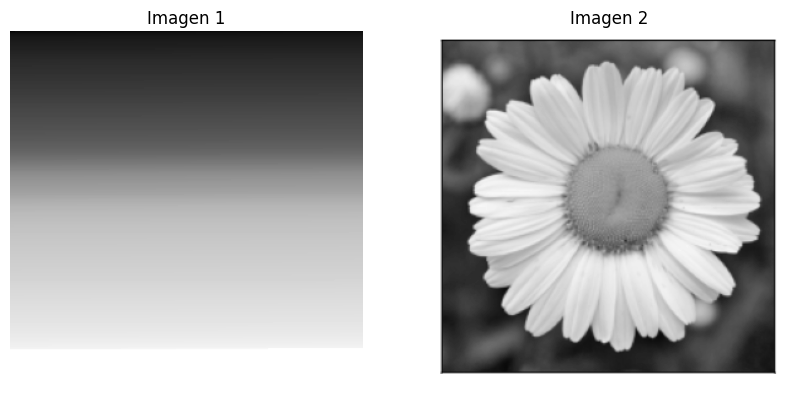

In [20]:
# Leer imágenes en escala de grises
img1_path = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\img1_tp.png'
img2_path = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\img2_tp.png'
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Verificar que las imágenes se hayan leído correctamente
if img1 is None or img2 is None:
    print(f"Error al leer las imágenes. Verifique las rutas:\n{img1_path}\n{img2_path}")
else:
    # Visualizar imágenes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Imagen 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('Imagen 2')
    plt.axis('off')

    plt.show()



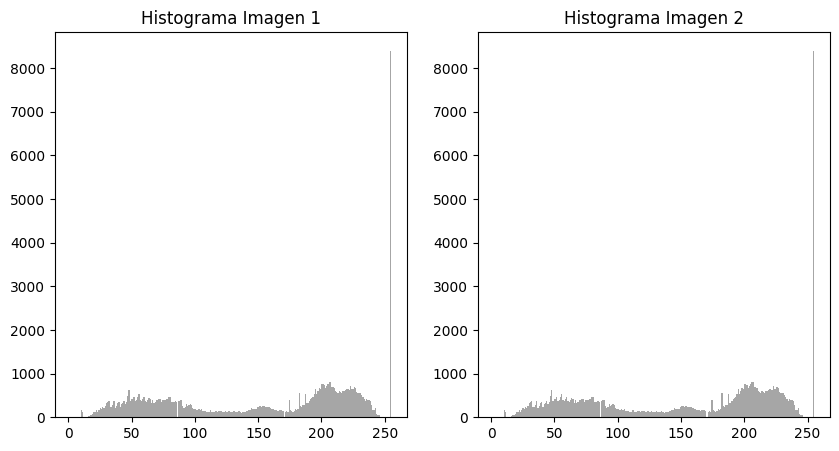

In [21]:
# Número de bins
bins = 256

# Calcular y graficar histogramas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(img1.ravel(), bins=bins, color='gray', alpha=0.7)
plt.title('Histograma Imagen 1')

plt.subplot(1, 2, 2)
plt.hist(img2.ravel(), bins=bins, color='gray', alpha=0.7)
plt.title('Histograma Imagen 2')

plt.show()


In [23]:
import numpy as np

def calculate_histogram_distance(hist1, hist2):
    """
    Calcula la distancia euclidiana entre dos histogramas.
    """
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

# Calcular los histogramas de las imágenes
hist1, _ = np.histogram(img1.ravel(), bins=bins)
hist2, _ = np.histogram(img2.ravel(), bins=bins)

# Normalizar los histogramas
hist1 = hist1 / np.sum(hist1)
hist2 = hist2 / np.sum(hist2)

# Calcular la distancia entre los histogramas
distance = calculate_histogram_distance(hist1, hist2)
print(f"Distancia entre los histogramas: {distance}")



Distancia entre los histogramas: 0.0


## Análisis de Histogramas para la Clasificación o Detección de Imágenes

El número de bins elegido afecta el nivel de detalle capturado en la distribución de intensidades. Un número mayor de bins proporciona un histograma más detallado, útil para capturar diferencias sutiles entre imágenes, lo cual puede ser relevante si características como el contraste o la iluminación son importantes para la tarea de clasificación. La distancia euclidiana entre los histogramas normalizados indica la similitud en la distribución de intensidades; una distancia de 0.0 implica que los histogramas son idénticos, aunque esto no garantiza que las imágenes sean visualmente idénticas en todos los aspectos.

La utilidad de los histogramas como características (features) para entrenar un modelo depende de si las diferencias en la distribución de intensidades son relevantes para la clasificación. Si bien una distancia de 0.0 entre histogramas sugiere una alta similitud en la distribución de intensidades, es importante considerar otros factores visuales y contextuales al desarrollar un modelo de clasificación o detección de imágenes, ya que los histogramas no capturan la información espacial de la distribución de píxeles en la imagen. Como lo que ocurre en este caso.


Paso 3: Segmentación de Imagen y Análisis de Histograma RGB

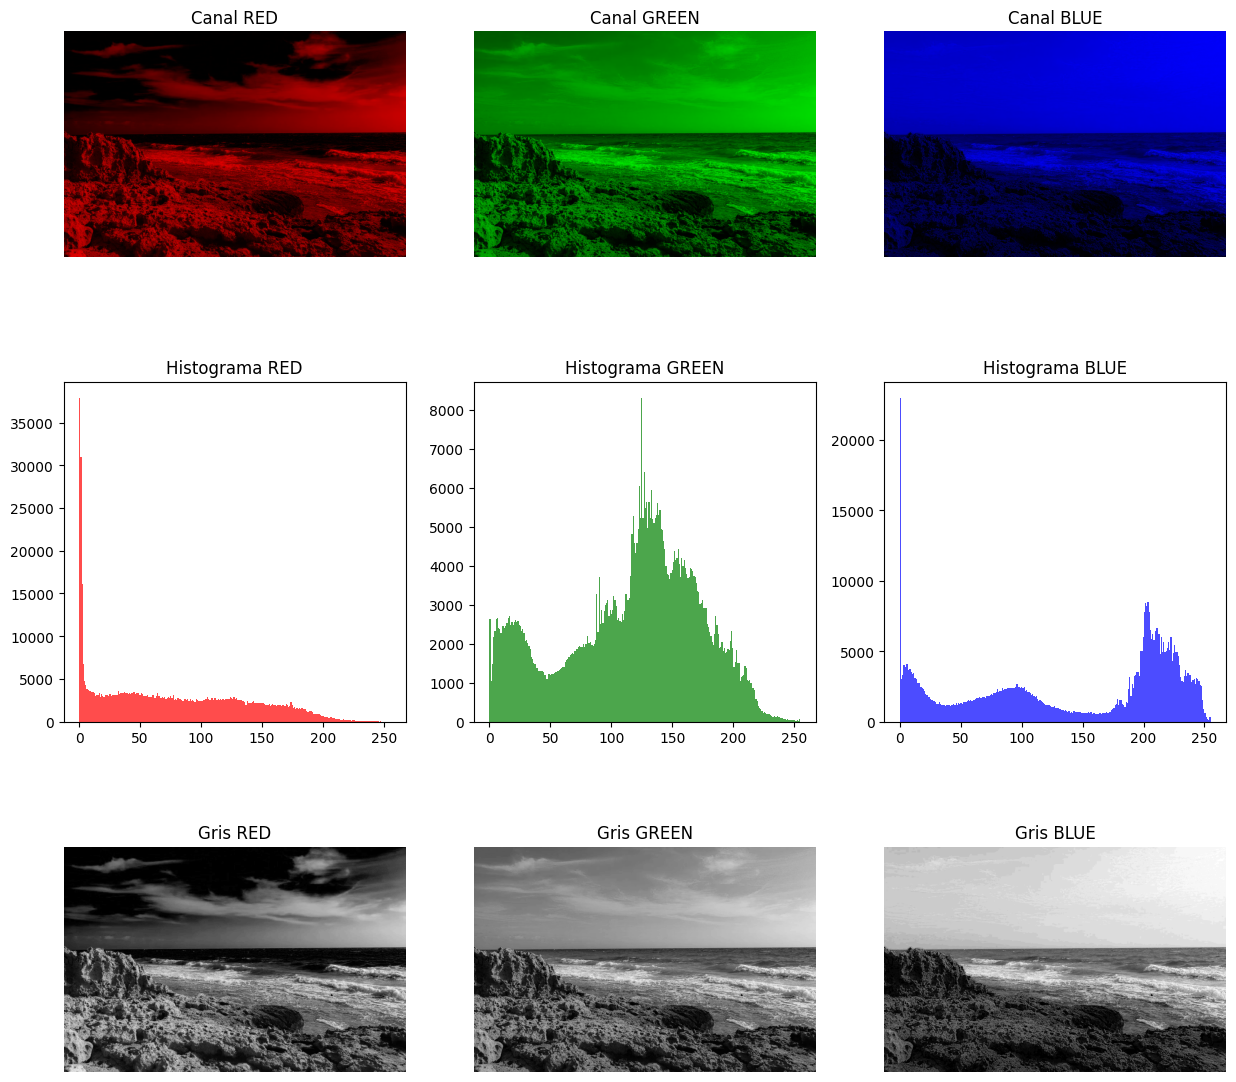

In [54]:

# Leer imagen en color
segmentacion = cv2.imread(r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\segmentacion.png')

# Convertir a RGB (OpenCV lee imágenes en BGR)
segmentacion_rgb = cv2.cvtColor(segmentacion, cv2.COLOR_BGR2RGB)

# Número de bins para el histograma
bins = 256

# Visualizar imágenes de un solo canal y sus histogramas
plt.figure(figsize=(15, 15))
for i, color in enumerate(['red', 'green', 'blue']):
    # Crear una imagen en negro
    single_channel_image = np.zeros_like(segmentacion_rgb)

    # Asignar el canal correspondiente a la imagen en negro
    single_channel_image[:, :, i] = segmentacion_rgb[:, :, i]

    # Mostrar la imagen de un solo canal
    plt.subplot(3, 3, i + 1)
    plt.imshow(single_channel_image)
    plt.title(f'Canal {color.upper()}')
    plt.axis('off')

    # Mostrar el histograma del canal correspondiente
    plt.subplot(3, 3, i + 4)
    plt.hist(segmentacion_rgb[:, :, i].ravel(), bins=bins, color=color, alpha=0.7)
    plt.title(f'Histograma {color.upper()}')

    # Convertir la imagen de un solo canal a escala de grises
    gray_image = cv2.cvtColor(single_channel_image, cv2.COLOR_RGB2GRAY)

    # Mostrar la imagen en escala de grises
    plt.subplot(3, 3, i + 7)
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'Gris {color.upper()}')
    plt.axis('off')

plt.show()



In [55]:
def segment_image(image, red_range, green_range, blue_range):
    """
    Segmenta una imagen basándose en rangos de valores para los canales de color.

    Parámetros:
    - image: Imagen en formato RGB.
    - red_range: Tupla con el rango de valores para el canal rojo (min, max).
    - green_range: Tupla con el rango de valores para el canal verde (min, max).
    - blue_range: Tupla con el rango de valores para el canal azul (min, max).

    Retorna:
    - mask: Máscara binaria que indica la segmentación.
    - segmented_image: Imagen con la segmentación aplicada.
    """
    # Descomponer la imagen en canales R, G, B
    red_channel, green_channel, blue_channel = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    # Aplicar rangos para segmentar la imagen
    mask = (red_channel >= red_range[0]) & (red_channel <= red_range[1]) & \
           (green_channel >= green_range[0]) & (green_channel <= green_range[1]) & \
           (blue_channel >= blue_range[0]) & (blue_channel <= blue_range[1])

    # Crear una imagen segmentada
    segmented_image = np.zeros_like(image)
    segmented_image[mask] = image[mask]

    return mask, segmented_image

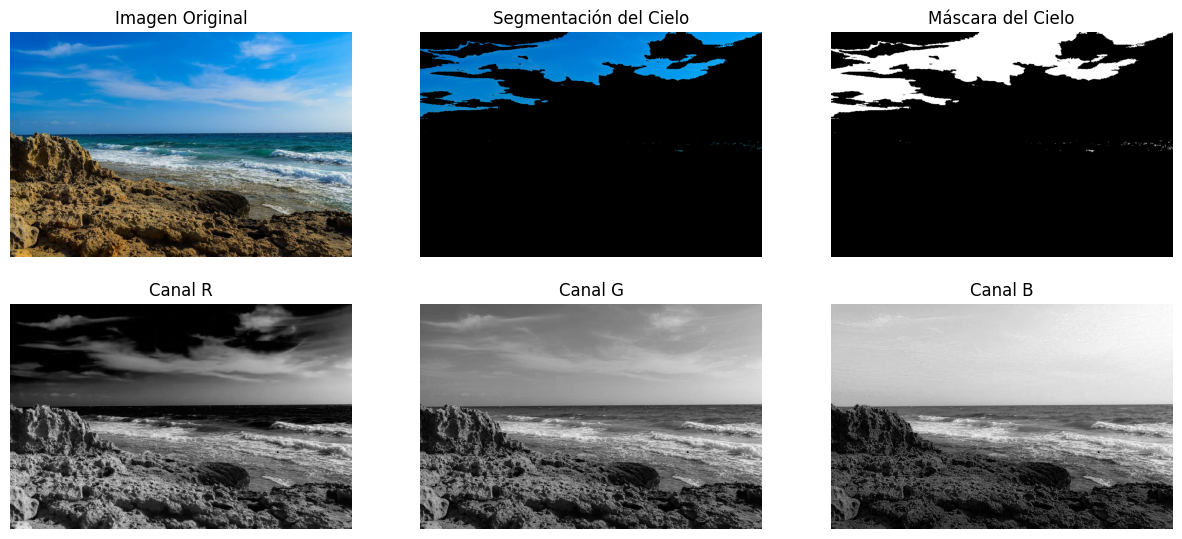

In [78]:
# Leer imagen en color
segmentacion_path = r'C:\Users\pedro\Documents\Especializacion\Vision\TP1_VisionComputacional1\segmentacion.png'
segmentacion = cv2.imread(segmentacion_path)

# Convertir a RGB (OpenCV lee imágenes en BGR)
segmentacion_rgb = cv2.cvtColor(segmentacion, cv2.COLOR_BGR2RGB)

# Definir rangos de valores para los canales de color
red_range = (0, 30)  # Valores bajísimos en rojo
green_range = (110, 200)  # Valores medio-altos en verde
blue_range = (90, 255)  # Valores altísimos en azul

# Aplicar la función de segmentación del cielo
mask, segmented_sky = segment_image(segmentacion_rgb, red_range , green_range, blue_range)

# Visualizar la segmentación, la imagen original y la descomposición por canales
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(3, 3, 1)
plt.imshow(segmentacion_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Segmentación del cielo
plt.subplot(3, 3, 2)
plt.imshow(segmented_sky)
plt.title('Segmentación del Cielo')
plt.axis('off')

# Máscara del cielo
plt.subplot(3, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Máscara del Cielo')
plt.axis('off')

# Descomposición por canales en escala de grises
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(3, 3, i + 4)
    plt.imshow(segmentacion_rgb[:, :, i], cmap='gray')
    plt.title(f'Canal {color}')
    plt.axis('off')


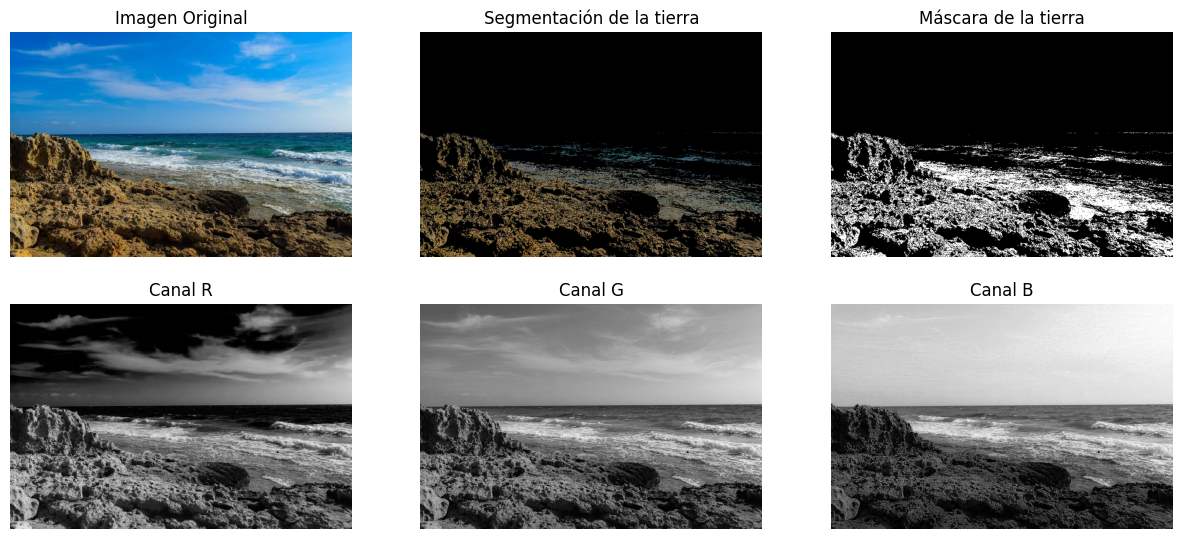

In [80]:
# Definir rangos de valores para los canales de color
red_range = (50, 255)  # Evitar colores rojos bajos
green_range = (70, 150)  # Valores medios en verde
blue_range = (40, 130)  # Azules bajos pero no tan bajos


# Aplicar la función de segmentación del cielo
mask, segmented_sky = segment_image(segmentacion_rgb, red_range , green_range, blue_range)

# Visualizar la segmentación, la imagen original y la descomposición por canales
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(3, 3, 1)
plt.imshow(segmentacion_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Segmentación del cielo
plt.subplot(3, 3, 2)
plt.imshow(segmented_sky)
plt.title('Segmentación de la tierra')
plt.axis('off')

# Máscara del cielo
plt.subplot(3, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Máscara de la tierra')
plt.axis('off')

# Descomposición por canales en escala de grises
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(3, 3, i + 4)
    plt.imshow(segmentacion_rgb[:, :, i], cmap='gray')
    plt.title(f'Canal {color}')
    plt.axis('off')


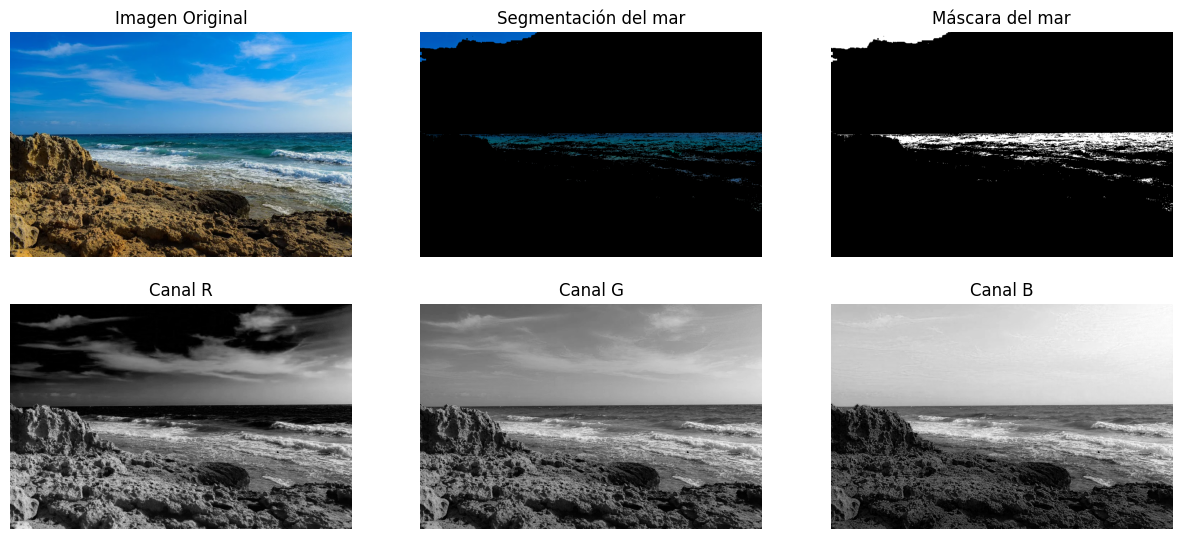

In [84]:
# Definir rangos de valores para los canales de color
red_range = (0, 80)  # Rojos muy bajos o bajos
green_range = (0, 100)  # Verdes bajos
blue_range = (90, 255)  # Azules oscuros


# Aplicar la función de segmentación del cielo
mask, segmented_sky = segment_image(segmentacion_rgb, red_range , green_range, blue_range)

# Visualizar la segmentación, la imagen original y la descomposición por canales
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(3, 3, 1)
plt.imshow(segmentacion_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Segmentación del cielo
plt.subplot(3, 3, 2)
plt.imshow(segmented_sky)
plt.title('Segmentación del mar')
plt.axis('off')

# Máscara del cielo
plt.subplot(3, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Máscara del mar')
plt.axis('off')

# Descomposición por canales en escala de grises
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(3, 3, i + 4)
    plt.imshow(segmentacion_rgb[:, :, i], cmap='gray')
    plt.title(f'Canal {color}')
    plt.axis('off')
